<a href="https://colab.research.google.com/github/jonatan-dam/DAT255-Notebooks/blob/main/notebooks/02_fashion_MNIST_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image recognition on the Fashion MNIST dataset

Instead of classifying ten digits, let's try a slightly harder example: Classifying black-and-white images of fashion items. This dataset is known as the ["Fashion MNIST" dataset](https://keras.io/api/datasets/fashion_mnist/), due to its similarity to the original MNIST data.

In [22]:
import numpy as np
import keras
import matplotlib.pyplot as plt

## Load the data
The dataset contains 60 000 training images and 10 000 testing images, from 10 different categories:

| Label | Description |
| ----- | ----- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [23]:
# Load the data and split it between train and test set
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Scale the images to the [0, 1] interval
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

# We add the "channel" dimension
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [24]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Scale the images to the [0, 1] interval
X_train = X_train.astype("float32") / 255.
X_test = X_test.astype("float32") / 255.

# Add the "channel" dimension
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

If we look at the target values in `y_train`, we see that these have labels 0-9:

In [25]:
print(y_train.shape)
print(y_train[:5])

(60000,)
[9 0 0 3 0]


But, we rather want them to be _categorical_: instead of
```
y_train[0] -> 9
```
we want
```
y_train[0] -> [0 0 0 0 0 0 0 0 0 1]
```

### <span style="color: red;">Exercise:<span>
Convert the labels to categorical format, using the function `keras.utils.to_categorical`.

In [26]:
#y_train = ...   # TODO
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = ...
y_test = keras.utils.to_categorical(y_test, num_classes)

Now, let's get the image shape (width and height) by checking the first image:

In [27]:
image_shape = X_train[0].shape
print(image_shape)

(28, 28, 1)


Define the class names from the table above:

In [28]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

Plot the first few images.

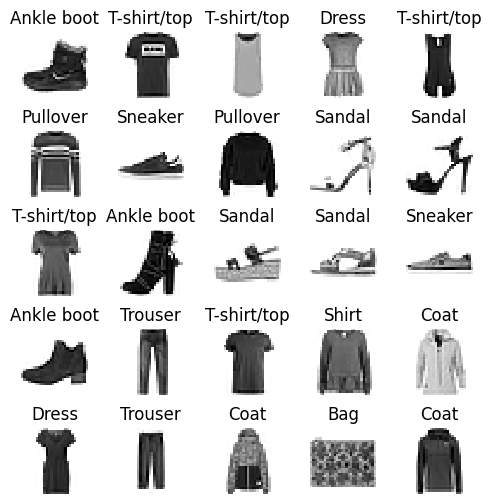

In [29]:
n_rows = 5
n_cols = 5
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[np.argmax(y_train[index])])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

### <span style="color: red;">Exercise:<span>
Create a neural network yourself, using the Keras API.

In [30]:
#model = ...     # TODO
model = keras.models.Sequential(
    [
      keras.layers.Input(shape=image_shape),
      keras.layers.Flatten(input_shape=[28,28]),
      keras.layers.Dense(32, activation="relu"),
      keras.layers.Dense(32, activation="relu"),
      keras.layers.Dense(32, activation="relu"),
      keras.layers.Dense(10, activation="softmax")
    ]
)

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,562 (107.66 KB)

 Trainable params: 27,562 (107.66 KB)

 Non-trainable params: 0 (0.00 B)

### Compile and train the network

In [31]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [32]:
batch_size = 128    # How many images to load in a single batch
epochs = 10         # How many times to iterate over the full dataset

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6095 - loss: 1.1199 - val_accuracy: 0.8317 - val_loss: 0.4739
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8384 - loss: 0.4672 - val_accuracy: 0.8465 - val_loss: 0.4254
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8546 - loss: 0.4152 - val_accuracy: 0.8557 - val_loss: 0.4020
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8603 - loss: 0.3928 - val_accuracy: 0.8518 - val_loss: 0.4115
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8646 - loss: 0.3761 - val_accuracy: 0.8605 - val_loss: 0.3876
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8743 - loss: 0.3588 - val_accuracy: 0.8675 - val_loss: 0.3698
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8770 - loss: 0.3391 - val_accuracy: 0.8653 - val_loss: 0.3731
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8801 - loss: 0.3333 - val_accuracy: 0.

### Plot the training performance

Let's plot the training performance as function of epoch number.

First, have a look at the contents of the `history` dictionary:

In [33]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


Plot the training and validation loss:

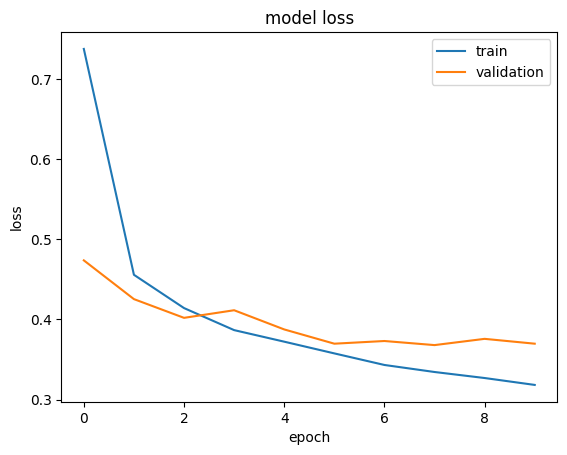

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

Plot the accuracy:

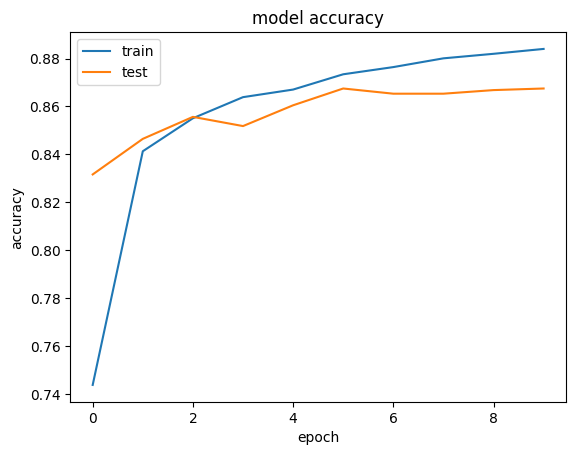

In [35]:

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Evaluate your model on the test data

In [36]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.3869660496711731
Test accuracy: 0.8618999719619751


### <span style="color: red;">Exercise:<span>
Try out different numbers of layers and different numbers of filters, to fint the best possible network. Train for as many epochs as you think is optimal (remember over- and underfitting).